In [1]:
print("hello")

hello


In [2]:
%conda install -c conda-forge shap


Channels:
 - conda-forge
 - nvidia
 - pytorch
Platform: linux-64
doneecting package metadata (repodata.json): - 
doneing environment: - 


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import shap
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display = True)
feature_names = list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.648804,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


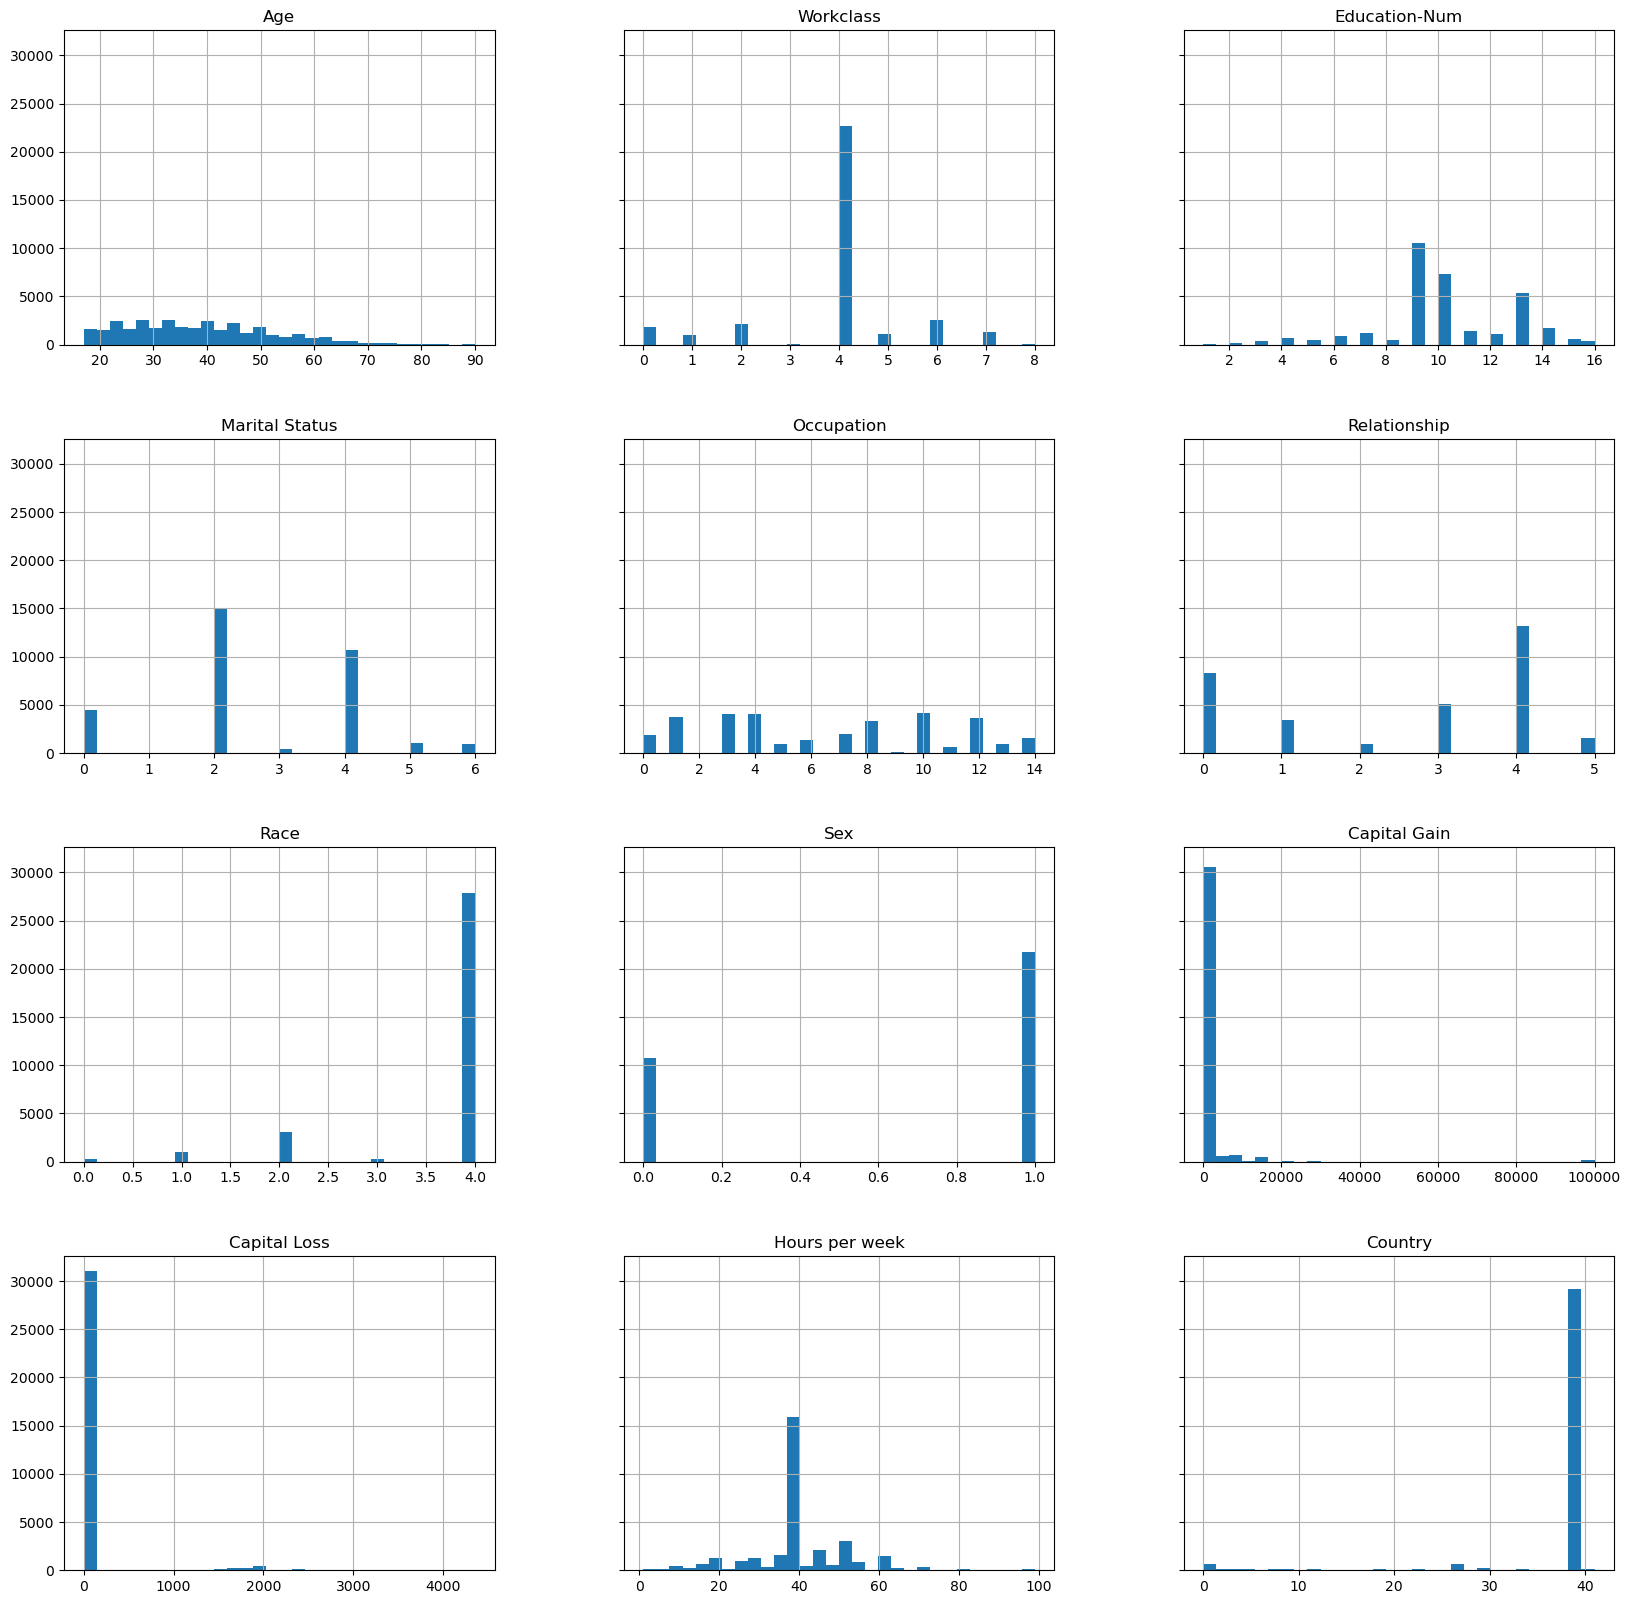

In [4]:
display(X.describe())
hist = X.hist(bins= 30,sharey = True, figsize = (20,20))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 1)
X_train_display = X_display.loc[X_train.index]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]


In [7]:
import pandas as pd

train = pd.concat([pd.Series(y_train, index=X_train.index, name='Income>50K', dtype=int), X_train], axis=1)
validation = pd.concat([pd.Series(y_val, index=X_val.index, name='Income>50K', dtype=int), X_val], axis=1)
test = pd.concat([pd.Series(y_test, index=X_test.index, name='Income>50K', dtype=int), X_test], axis=1)

In [8]:
train

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [9]:
validation

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
16530,0,25.0,4,4.0,2,6,4,4,1,0.0,0.0,40.0,26
26723,0,41.0,6,9.0,2,5,5,4,0,0.0,0.0,40.0,39
3338,0,79.0,0,9.0,6,0,0,2,0,0.0,0.0,30.0,39
19367,1,43.0,2,15.0,2,10,4,4,1,15024.0,0.0,45.0,39
30274,0,51.0,5,9.0,4,12,2,4,1,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,0,46.0,7,9.0,2,13,4,4,1,0.0,0.0,40.0,39
5937,1,71.0,4,10.0,6,12,0,4,1,0.0,0.0,35.0,39
11034,0,36.0,4,9.0,5,14,2,4,1,0.0,0.0,60.0,26
2819,0,31.0,4,9.0,4,8,0,4,0,0.0,0.0,40.0,39


In [10]:
test

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
9646,0,62.0,6,4.0,6,8,0,4,0,0.0,0.0,66.0,39
709,0,18.0,4,7.0,4,8,2,4,1,0.0,0.0,25.0,39
7385,1,25.0,4,13.0,4,5,3,4,1,27828.0,0.0,50.0,39
16671,0,33.0,4,9.0,2,10,4,4,1,0.0,0.0,40.0,39
21932,0,36.0,4,7.0,4,7,1,4,0,0.0,0.0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,1,39.0,4,13.0,2,10,5,4,0,0.0,0.0,20.0,39
25723,0,17.0,4,6.0,4,12,3,4,0,0.0,0.0,20.0,39
29514,0,35.0,4,9.0,4,14,3,4,1,0.0,0.0,40.0,39
1600,0,30.0,4,7.0,2,3,4,4,1,0.0,0.0,45.0,39


In [11]:
# Use 'csv' format to store the data
# The first column is expected to be the output column
train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

In [12]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[03/09/25 23:51:38] INFO     Found credentials from IAM Role:                                   ]8;id=239198;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=199454;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


                    INFO     Found credentials from IAM Role:                                   ]8;id=626128;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=263194;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

[03/09/25 23:51:39] INFO     Found credentials from IAM Role:                                   ]8;id=378632;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=48058;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

[03/09/25 23:51:40] INFO     Found credentials from IAM Role:                                   ]8;id=608445;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=484691;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [13]:
! aws s3 ls {bucket}/{prefix}/data --recursive

2025-03-09 23:51:40     786285 demo-sagemaker-xgboost-adult-income-prediction/data/train.csv
2025-03-09 23:51:41     262122 demo-sagemaker-xgboost-adult-income-prediction/data/validation.csv


In [14]:
import sagemaker

region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

[03/09/25 23:51:41] INFO     Found credentials from IAM Role:                                   ]8;id=71511;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=656882;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

AWS Region: us-east-1


                    INFO     Found credentials from IAM Role:                                   ]8;id=365940;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=537748;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

RoleArn: arn:aws:iam::991368024725:role/service-role/AmazonSageMaker-ExecutionRole-20250308T195417


In [15]:
sagemaker.__version__

'2.240.0'

In [16]:
from sagemaker.debugger import Rule, rule_configs
from sagemaker.session import TrainingInput

s3_output_location = 's3://{}/{}/{}'.format(bucket, prefix, 'xgboost_model')

container = sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")
print(container)

xgb_model = sagemaker.estimator.Estimator(
    image_uri=container,
    role=role,
    instance_count=1,
    instance_type='ml.m4.xlarge',
    volume_size=5,
    output_path=s3_output_location,
    sagemaker_session=sagemaker.Session(),
    rules=[Rule.sagemaker(rule_configs.create_xgboost_report())]
)

[03/09/25 23:51:42] INFO     Ignoring unnecessary instance type: None.                            ]8;id=364408;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=843786;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#530\530]8;;\

683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.2-1


                    INFO     Found credentials from IAM Role:                                   ]8;id=417339;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=460978;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Found credentials from IAM Role:                                   ]8;id=15003;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=187338;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1132\1132]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

In [17]:
xgb_model.set_hyperparameters(
    max_depth=5,
    eta=0.2,
    gamma=4,
    min_child_weight=6,
    subsample=0.7,
    objective="binary:logistic",
    num_round=1000
)

In [18]:
from sagemaker.session import TrainingInput

train_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/train.csv"), content_type="csv"
)
validation_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/validation.csv"), content_type="csv"
)

In [19]:
xgb_model.fit({"train": train_input, "validation": validation_input}, wait=True)

                    INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=707243;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=506261;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py#91\91]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=602486;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=254606;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#530\530]8;;\

                    INFO     Creating training-job with name:                                       ]8;id=94486;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=6672;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1042\1042]8;;\
                             sagemaker-xgboost-2025-03-09-23-51-42-366                                             

2025-03-09 23:51:45 Starting - Starting the training job...
2025-03-09 23:52:08 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
.....
..25-03-09 23:53:08 Downloading - Downloading input data.
.....03-09 23:53:48 Downloading - Downloading the training image.
.[2025-03-09 23:54:54.269 ip-10-2-179-150.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Single node training

In [20]:
rule_output_path = xgb_model.output_path + "/" + xgb_model.latest_training_job.name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

2025-03-09 23:56:07        314 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-03-09-23-51-42-366/rule-output/CreateXgboostReport/xgboost-reports/ConfusionMatrix.json
2025-03-09 23:56:07        734 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-03-09-23-51-42-366/rule-output/CreateXgboostReport/xgboost-reports/EvaluationMetrics.json
2025-03-09 23:56:07       2691 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-03-09-23-51-42-366/rule-output/CreateXgboostReport/xgboost-reports/FeatureImportance.json
2025-03-09 23:56:07       9599 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-03-09-23-51-42-366/rule-output/CreateXgboostReport/xgboost-reports/IterativeClassAccuracy.json
2025-03-09 23:56:07        180 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-03-09-23-51-42-366/rule-output/CreateXgboostReport/xgboost-rep

In [21]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-991368024725/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-03-09-23-51-42-366/rule-output/CreateXgboostReport/xgboost-reports/ConfusionMatrix.json to CreateXgboostReport/xgboost-reports/ConfusionMatrix.json
download: s3://sagemaker-us-east-1-991368024725/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-03-09-23-51-42-366/rule-output/CreateXgboostReport/xgboost-reports/EvaluationMetrics.json to CreateXgboostReport/xgboost-reports/EvaluationMetrics.json
download: s3://sagemaker-us-east-1-991368024725/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-03-09-23-51-42-366/rule-output/CreateXgboostReport/xgboost-reports/FeatureImportance.json to CreateXgboostReport/xgboost-reports/FeatureImportance.json
download: s3://sagemaker-us-east-1-991368024725/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-03-09-23-51-42-366/r

In [22]:
from IPython.display import FileLink, FileLinks
display("Click link below to view the XGBoost Training report", FileLink("CreateXgboostReport/xgboost_report.html"))

'Click link below to view the XGBoost Training report'

/home/ec2-user/SageMaker/CreateXgboostReport/xgboost_report.html

In [23]:
# Retrieve the rule summary
rule_summary = xgb_model.latest_training_job.rule_job_summary()

# Print the rule summary for debugging
print("Rule Summary:", rule_summary)

# Find the profile rule
profile_rules = [rule["RuleConfigurationName"]
                 for rule in rule_summary
                 if "Profile" in rule["RuleConfigurationName"]]

# Handle the case where no profile rule is found
if profile_rules:
    profile_report_name = profile_rules[0]
    print("Profile Report Name:", profile_report_name)
else:
    profile_report_name = None
    print("No profile rule found. Check if a profiling rule was configured.")

Rule Summary: [{'RuleConfigurationName': 'CreateXgboostReport', 'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:991368024725:processing-job/sagemaker-xgboost-2025-03--CreateXgboostReport-751ddd80', 'RuleEvaluationStatus': 'InProgress', 'LastModifiedTime': datetime.datetime(2025, 3, 9, 23, 56, 28, 880000, tzinfo=tzlocal())}]
No profile rule found. Check if a profiling rule was configured.


In [24]:
xgb_model.model_data

's3://sagemaker-us-east-1-991368024725/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2025-03-09-23-51-42-366/output/model.tar.gz'

In [25]:

import sagemaker 
from sagemaker.serializers import CSVSerializer
xgb_predictor=xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    serializer=CSVSerializer()
)



[03/09/25 23:56:33] INFO     Creating model with name: sagemaker-xgboost-2025-03-09-23-56-33-734    ]8;id=796761;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=637015;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

[03/09/25 23:56:34] INFO     Creating endpoint-config with name                                     ]8;id=956975;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=605427;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\
                             sagemaker-xgboost-2025-03-09-23-56-33-734                                             

                    INFO     Creating endpoint with name sagemaker-xgboost-2025-03-09-23-56-33-734  ]8;id=232493;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=650353;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

-----------!

In [26]:
xgb_predictor.endpoint_name

'sagemaker-xgboost-2025-03-09-23-56-33-734'

In [27]:
import numpy as np

def predict(data, rows=1000):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:], sep=',')

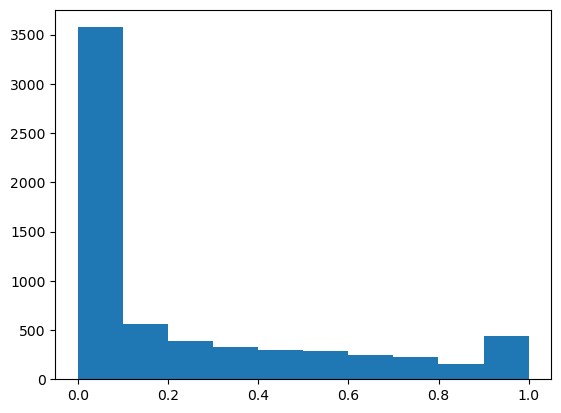

In [28]:
import matplotlib.pyplot as plt

predictions = predict(test.to_numpy()[:, 1:])
plt.hist(predictions)
plt.show()

In [30]:
import sklearn

cutoff = 0.5
print(sklearn.metrics.confusion_matrix(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))
print(sklearn.metrics.classification_report(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))

[[4670  356]
 [ 480 1007]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.74      0.68      0.71      1487

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



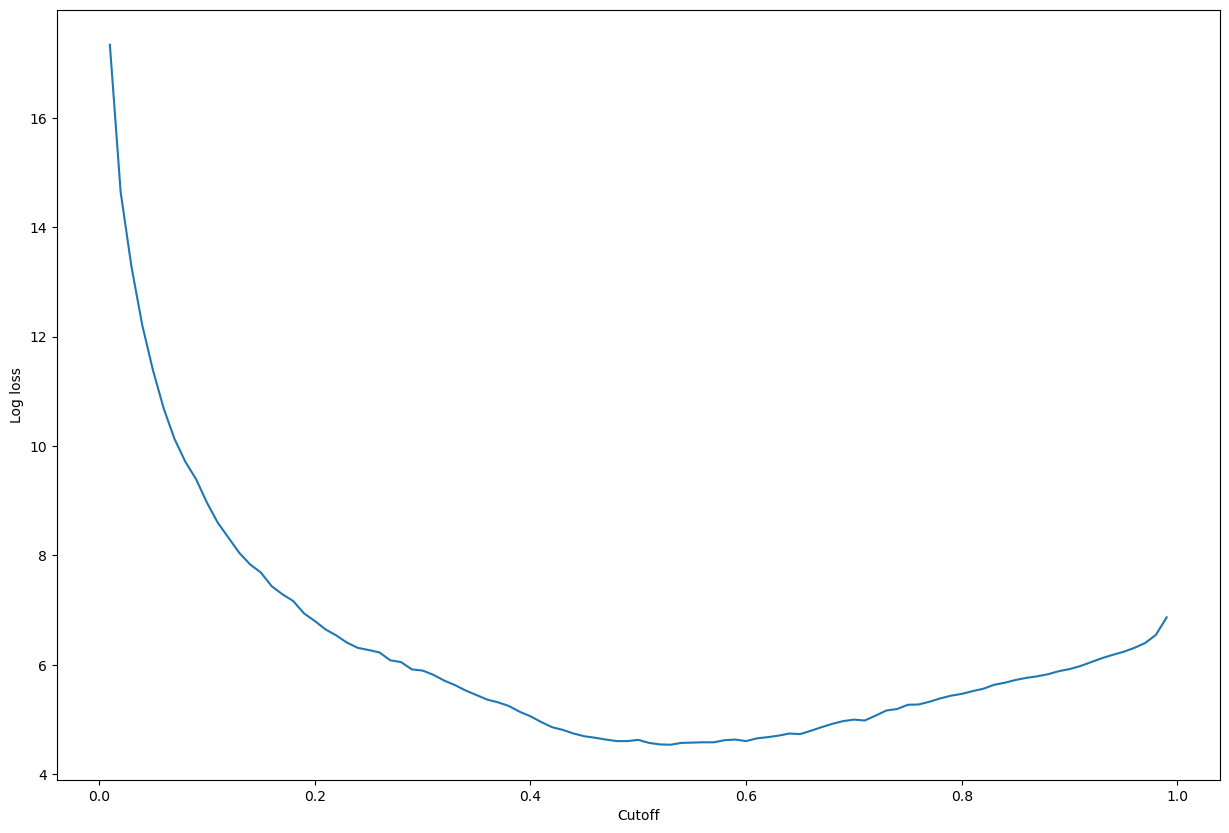

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

cutoffs = np.arange(0.01, 1, 0.01)
log_loss = []

for c in cutoffs:
    log_loss.append(
        sklearn.metrics.log_loss(test.iloc[:, 0], np.where(predictions > c, 1, 0))
    )

plt.figure(figsize=(15, 10))
plt.plot(cutoffs, log_loss)
plt.xlabel("Cutoff")
plt.ylabel("Log loss")
plt.show()

In [32]:
print(
    'Log loss is minimized at a cutoff of ', cutoffs[np.argmin(log_loss)],
    ', and the log loss value at the minimum is ', np.min(log_loss)
)

Log loss is minimized at a cutoff of  0.53 , and the log loss value at the minimum is  4.537969565342555
